# A walk through example of PCA being counter productive to classification tasks

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale

np.random.seed(18937)

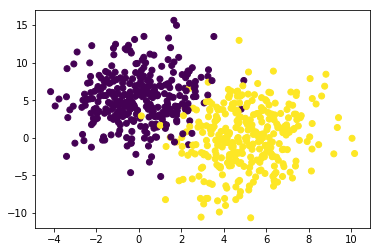

In [2]:
num_per_class = 320

# Builds two class data set in 2-D space
dataset2 = np.vstack([
  np.hstack([np.random.multivariate_normal([0,5], [[3, 1], [1, 16]], num_per_class), np.zeros((num_per_class, 1))]),
  np.hstack([np.random.multivariate_normal([5,0], [[3, 1], [1, 16]], num_per_class), np.ones((num_per_class, 1))])
])

np.random.shuffle(dataset2)

plt.scatter(dataset2[:, 0], dataset2[:, 1], c=dataset2[:, 2])


In [3]:
import numpy
from matplotlib import pyplot

# Carve out the classes for feature X-axis
d0 = dataset2[np.where(dataset2[:, 2]==0), 0].reshape(num_per_class)
d1 = dataset2[np.where(dataset2[:, 2]==1), 0].reshape(num_per_class)


# Histograms of Original First Dimension

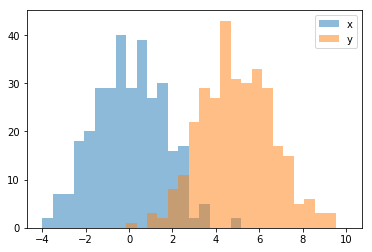

In [4]:

# Normalize the buckets across 
bins = numpy.linspace(-4, 10, 30)

pyplot.hist(d0, bins, alpha=0.5, label='x')
pyplot.hist(d1, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()



### Transforming with PCA

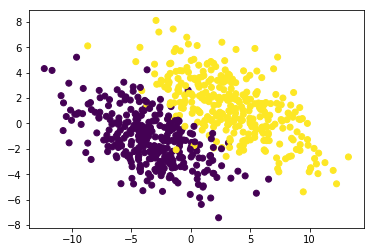

In [5]:
dataset2_PCA = PCA().fit_transform(dataset2[:, :2])

plt.scatter(dataset2_PCA[:, 0], dataset2_PCA[:, 1], c=dataset2[:, 2])

# Histograms of First Princpal Component

In [6]:
# Carve out the classes for feature X-axis
d0 = dataset2_PCA[np.where(dataset2[:, 2]==0), 0].reshape(num_per_class)
d1 = dataset2_PCA[np.where(dataset2[:, 2]==1), 0].reshape(num_per_class)

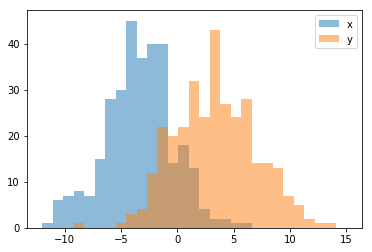

In [7]:
# Normalize the buckets across 
bins = numpy.linspace(-12, 15, 30)

pyplot.hist(d0, bins, alpha=0.5, label='x')
pyplot.hist(d1, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

# Histograms of Second Princpal Component

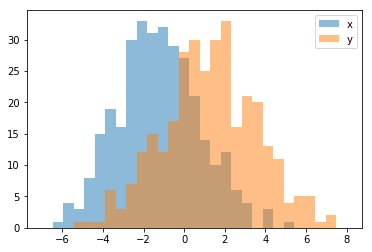

In [8]:
# Normalize the buckets across 
bins = numpy.linspace(-7, 8, 30)

# Carve out the classes for feature X-axis
d0 = dataset2_PCA[np.where(dataset2[:, 2]==0), 1].reshape(num_per_class)
d1 = dataset2_PCA[np.where(dataset2[:, 2]==1), 1].reshape(num_per_class)

pyplot.hist(d0, bins, alpha=0.5, label='x')
pyplot.hist(d1, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

## We see that the overlap along each dimension has increased after PCA!